In [1]:
# Notebook library imports

import pandas as pd
import numpy as np

In [2]:
# %load get_data.py
def get_data() :
    
    import pandas as pd
    
    csv_beer = pd.read_csv("/home/grimoire/Projects/BeerRatings/beer_reviews.csv")
    beer_ratings = pd.DataFrame(csv_beer)
    
    return beer_ratings


In [3]:
beer_ratings = get_data()

In [4]:
beer_ratings.loc[:,['review_overall','review_aroma','review_appearance',
                    'review_palate','review_taste','beer_abv']].describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06
mean,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00
std,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02
25%,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00
75%,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01


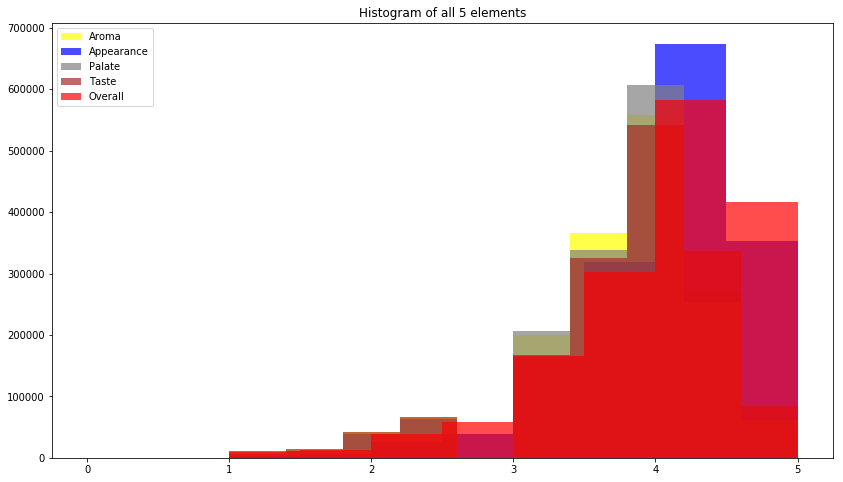

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=[14,8])

plt.hist(beer_ratings.review_aroma.values, alpha=.7, color='yellow', label='Aroma')
plt.hist(beer_ratings.review_appearance.values, alpha=.7, color='blue', label='Appearance')
plt.hist(beer_ratings.review_palate.values, alpha=.7, color='grey', label='Palate')
plt.hist(beer_ratings.review_taste.values, alpha=.7, color='brown', label='Taste')
plt.hist(beer_ratings.review_overall.values, alpha=.7, color='red', label='Overall')

plt.title('Histogram of all 5 elements')
plt.legend(loc=2)

plt.show()

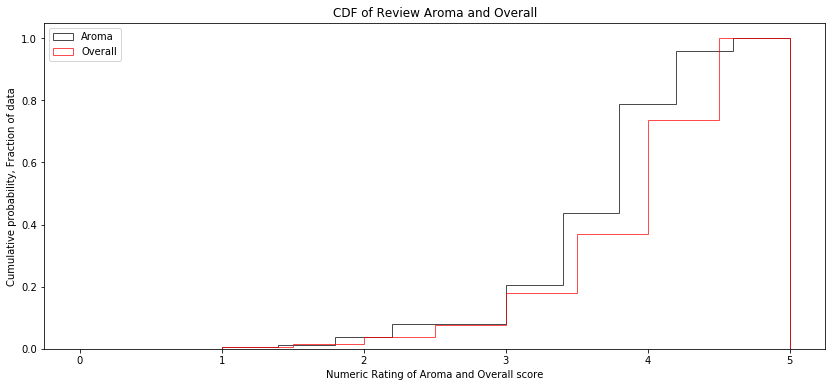

In [59]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_aroma.values, normed=True, cumulative=True, 
         label='Aroma', histtype='step', alpha=0.7, color='k')
plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.legend()
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Aroma and Overall score')
plt.title('CDF of Review Aroma and Overall')
plt.show()

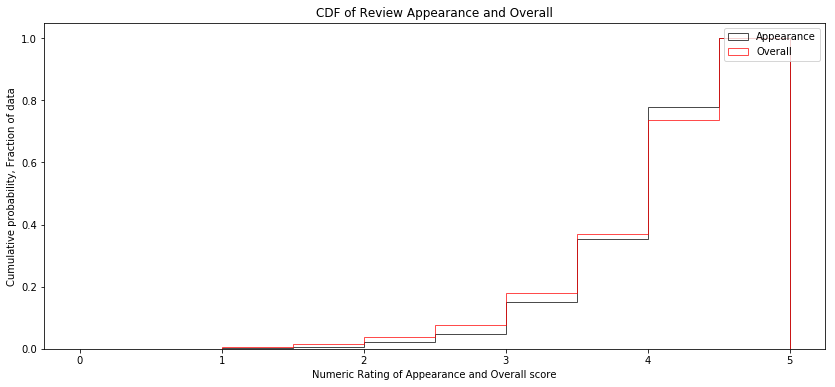

In [60]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_appearance.values, normed=True, cumulative=True, 
         label='Appearance', histtype='step', alpha=0.7, color='k')
plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.legend()
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Appearance and Overall score')
plt.title('CDF of Review Appearance and Overall')
plt.show()

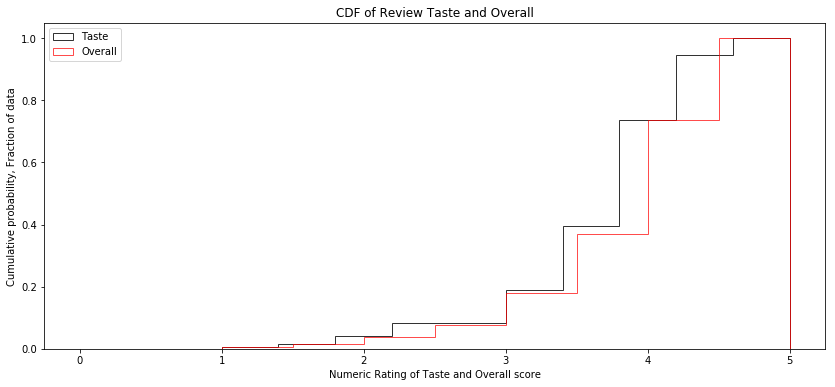

In [61]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_taste.values, normed=True, cumulative=True, 
         label='Taste', histtype='step', alpha=0.7, color='k')
plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.legend()
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Taste and Overall score')
plt.title('CDF of Review Taste and Overall')
plt.show()

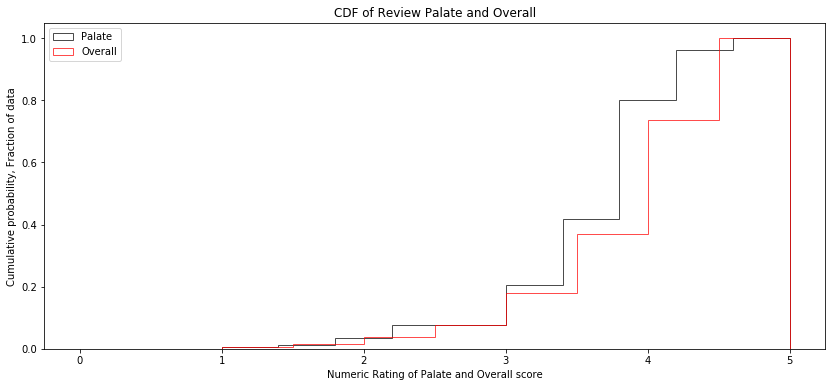

In [58]:
plt.figure(figsize=[14,6])
plt.hist(beer_ratings.review_palate.values, normed=True, cumulative=True, 
         label='Palate', histtype='step', alpha=0.7, color='k')
plt.hist(beer_ratings.review_overall.values, normed=True, cumulative=True, 
         label='Overall', histtype='step', alpha=0.7, color='red')
plt.legend()
plt.ylabel('Cumulative probability, Fraction of data')
plt.xlabel('Numeric Rating of Palate and Overall score')
plt.title('CDF of Review Palate and Overall')
plt.show()

### Modeling prediction accuracy of review traits to review_overall with logistic regression

In [6]:
# For model building
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression

# Optimizations
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [7]:
beer_ratings.keys()

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [8]:
target = beer_ratings['review_overall']
target.describe()

count    1.586614e+06
mean     3.815581e+00
std      7.206219e-01
min      0.000000e+00
25%      3.500000e+00
50%      4.000000e+00
75%      4.500000e+00
max      5.000000e+00
Name: review_overall, dtype: float64

In [9]:
target = pd.DataFrame(target)

In [10]:
target['good'] = target['review_overall'].apply(lambda x:1 if x>=3.5 else 0)

In [11]:
predictors = beer_ratings.loc[:,['review_aroma','review_appearance',
                    'review_palate','review_taste']]
# beer_abv contains missing nan float dtype data

In [12]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 4 columns):
review_aroma         1586614 non-null float64
review_appearance    1586614 non-null float64
review_palate        1586614 non-null float64
review_taste         1586614 non-null float64
dtypes: float64(4)
memory usage: 48.4 MB


In [13]:
predictors.values

array([[ 2. ,  2.5,  1.5,  1.5],
       [ 2.5,  3. ,  3. ,  3. ],
       [ 2.5,  3. ,  3. ,  3. ],
       ..., 
       [ 3.5,  3. ,  3.5,  4. ],
       [ 4.5,  4.5,  4.5,  4.5],
       [ 4.5,  4.5,  4.5,  4.5]])

In [14]:
print(predictors.shape)
print(target.shape)

(1586614, 4)
(1586614, 2)


In [15]:
predictors.keys()

Index(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'], dtype='object')

In [62]:
review_predictors = {}

# Split the training data by review type
review_predictors['aroma'] = predictors['review_aroma'].values.reshape(-1,1)
review_predictors['appearance'] = predictors['review_appearance'].values.reshape(-1,1)
review_predictors['palate'] = predictors['review_palate'].values.reshape(-1,1)
review_predictors['taste'] = predictors['review_taste'].values.reshape(-1,1)
review_predictors['combined'] = predictors.values

In [63]:
predictor_results = {}

for x in review_predictors :
    
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(review_predictors[str(x)], 
                                              target['good'].values, test_size=.3, random_state=42)

    log_reg = LogisticRegression()

    # Fit the model on the trainng data.
    log_reg.fit(Xlr, ylr)

    # Predict the labels
    y_pred = log_reg.predict(Xlr)
    # Print the accuracy from the testing data.
    predictor_results[str(x)] = accuracy_score(log_reg.predict(Xtestlr), ytestlr)

In [64]:
predictor_results

{'appearance': 0.83954116201140794,
 'aroma': 0.86082334527348547,
 'combined': 0.90864417996365432,
 'palate': 0.8687458638402471,
 'taste': 0.90161034486380875}

### Testing ABV with review_overall logistic regression

In [27]:
# ABV logistic testing
abv = beer_ratings['beer_abv'].astype(str)
abv_filter = (abv != 'nan')

# abv will have the proper observation len for review_overall as beer_abv
abv = beer_ratings[abv_filter]

In [37]:
# setup the target values for abv

target_abv = abv['review_overall']
target_abv = pd.DataFrame(target_abv)
target_abv['good'] = target_abv['review_overall'].apply(lambda x:1 if x>=3.5 else 0)

In [40]:
predictor_abv = abv['beer_abv'].values.reshape(-1,1)

In [41]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(predictor_abv, 
                                              target_abv['good'].values, test_size=.3, random_state=42)

log_reg = LogisticRegression()

# Fit the model on the trainng data.
log_reg.fit(Xlr, ylr)

# Predict the labels
y_pred = log_reg.predict(Xlr)

# Print the accuracy from the testing data.
print(accuracy_score(log_reg.predict(Xtestlr), ytestlr))

0.823517663816


### building a model with ABV and other review characteristics

In [66]:
abv_total = abv.loc[:,['review_aroma','review_appearance',
                    'review_palate','review_taste', 'beer_abv']]

In [67]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(abv_total, 
                                              target_abv['good'].values, test_size=.3, random_state=42)

log_reg = LogisticRegression()

# Fit the model on the trainng data.
log_reg.fit(Xlr, ylr)

# Predict the labels
y_pred = log_reg.predict(Xlr)

# Print the accuracy from the testing data.
print(accuracy_score(log_reg.predict(Xtestlr), ytestlr))

0.91126722543
